358713 podcasts


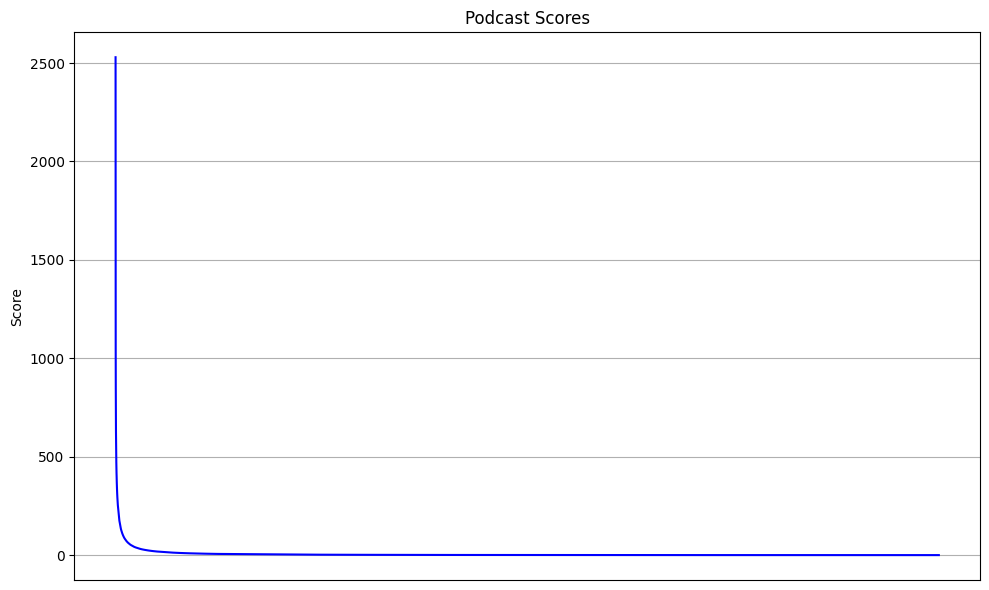

In [1]:
import sqlite3
import matplotlib.pyplot as plt


def plot_scores():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT score.rank_score
        FROM podcast
        INNER JOIN score ON podcast.id = score.podcast_id
        ORDER BY score.rank_score DESC
        """
    )

    scores = [podcast[0] for podcast in cursor.fetchall()]
    print(len(scores), "podcasts")

    plt.figure(figsize=(10, 6))
    plt.plot(scores, linestyle="-", color="b", label="Podcast Scores")

    plt.xticks([])

    plt.ylabel("Score")
    plt.title("Podcast Scores")

    plt.grid(True)

    plt.tight_layout()
    plt.show()

    conn.close()


plot_scores()

In [2]:
# Overall top 1000 podcasts
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT podcast.name, podcast.url, score.rank_score, podcast.category
        FROM podcast
        JOIN score ON podcast.id = score.podcast_id
        ORDER BY score.rank_score DESC
        LIMIT 1000
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


top_podcasts = get_top_podcasts()
for name, url, score, category in top_podcasts:
    print(f"{score:.2f} - {category} - {name} - {url}")

results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {category} - {name}</a></div>'
    for idx, (name, url, score, category) in enumerate(top_podcasts)
]

results_html = "\n".join(results)
html = f"""
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Top Podcasts</title>
    </head>
    <body>
        {results_html}
    </body>
</html>
"""
out_path = working_dir / f"top_podcasts.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

2529.52 - education - The Mel Robbins Podcast - https://podcasts.apple.com/ca/podcast/the-mel-robbins-podcast/id1646101002
2380.59 - education - The Mel Robbins Podcast - https://podcasts.apple.com/ca/podcast/the-mel-robbins-podcast/id1646101002
2299.18 - history - The Rest Is History - https://podcasts.apple.com/ca/podcast/the-rest-is-history/id1537788786
2231.80 - education - The Mel Robbins Podcast - https://podcasts.apple.com/ca/podcast/the-mel-robbins-podcast/id1646101002
2155.83 - history - The Rest Is History - https://podcasts.apple.com/ca/podcast/the-rest-is-history/id1537788786
2083.02 - education - The Mel Robbins Podcast - https://podcasts.apple.com/ca/podcast/the-mel-robbins-podcast/id1646101002
2012.66 - history - The Rest Is History - https://podcasts.apple.com/ca/podcast/the-rest-is-history/id1537788786
1934.01 - education - The Mel Robbins Podcast - https://podcasts.apple.com/ca/podcast/the-mel-robbins-podcast/id1646101002
1869.19 - history - The Rest Is History - http

In [3]:
# top 100 news podcasts
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT podcast.name, podcast.url, score.rank_score
        FROM podcast
        INNER JOIN score ON podcast.id = score.podcast_id
        WHERE podcast.category = 'news'
        ORDER BY score.rank_score DESC
        LIMIT 100
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


top_podcasts = get_top_podcasts()
for name, url, score in top_podcasts:
    print(f"{score:.2f} - {name} - {url}")

results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name}</a></div>'
    for idx, (name, url, score) in enumerate(top_podcasts)
]

results_html = "\n".join(results)
html = f"""
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Top Podcasts</title>
    </head>
    <body>
        {results_html}
    </body>
</html>
"""
out_path = working_dir / f"news_podcasts.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

1190.19 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
1117.30 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
1044.88 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
972.51 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
900.20 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
827.48 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
754.37 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
681.19 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
628.11 - Diddy On Trial - https://podcasts.apple.com/ca/podcast/diddy-on-trial/id1781636710
609.24 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736
587.31 - Diddy On Trial - https://podcasts.apple.com/ca/podcast/diddy-on-trial/id1781636710
573.41 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200

In [4]:
# top 100 news with country weights
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT
            p.name,
            p.url,
            s.rank_score,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'us' ORDER BY r.scraped_at DESC LIMIT 1) as us_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'ca' ORDER BY r.scraped_at DESC LIMIT 1) as ca_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'gb' ORDER BY r.scraped_at DESC LIMIT 1) as gb_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'au' ORDER BY r.scraped_at DESC LIMIT 1) as au_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'nz' ORDER BY r.scraped_at DESC LIMIT 1) as nz_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'ie' ORDER BY r.scraped_at DESC LIMIT 1) as ie_rank
        FROM podcast p
        INNER JOIN score s ON p.id = s.podcast_id
        WHERE p.category = 'news'
        ORDER BY s.rank_score DESC
        LIMIT 100
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


def format_ranks(us, ca, gb, au, nz, ie):
    ranks = []
    if us is not None:
        ranks.append(f"US: {us}")
    if ca is not None:
        ranks.append(f"CA: {ca}")
    if gb is not None:
        ranks.append(f"GB: {gb}")
    if au is not None:
        ranks.append(f"AU: {au}")
    if nz is not None:
        ranks.append(f"NZ: {nz}")
    if ie is not None:
        ranks.append(f"IE: {ie}")
    return " ".join(ranks)


top_podcasts = get_top_podcasts()

# Display in console
for name, url, score, us, ca, gb, au, nz, ie in top_podcasts:
    rank_info = format_ranks(us, ca, gb, au, nz, ie)
    print(f"{score:.2f} - {name} - {url} | {rank_info}")

# Create HTML output
results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name} | {format_ranks(us, ca, gb, au, nz, ie)}</a></div>'
    for idx, (name, url, score, us, ca, gb, au, nz, ie) in enumerate(top_podcasts)
]

results_html = "\n".join(results)

html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Top News Podcasts</title>
</head>
<body>
    {results_html}
</body>
</html>
"""
out_path = working_dir / f"news_podcasts_country_weights.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

1190.19 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
1117.30 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
1044.88 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
972.51 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
900.20 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
827.48 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
754.37 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
681.19 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
628.11 - Diddy On Trial - https://podcasts.apple.com/ca/podcast/diddy-on-trial/id1781636710 | 
609.24 - The Daily - https://podcasts.apple.com/ca/podcast/the-daily/id1200361736 | 
587.31 - Diddy On Trial - https://podcasts.apple.com/ca/podcast/diddy-on-trial/id1781636710 | 
573.41 - The Daily - https://podcasts.appl

In [5]:
# top 100 society and culture with country weights
from pathlib import Path
import sqlite3

workingdir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT
            p.name,
            p.url,
            s.rank_score,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'us' ORDER BY r.scraped_at DESC LIMIT 1) as us_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'ca' ORDER BY r.scraped_at DESC LIMIT 1) as ca_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'gb' ORDER BY r.scraped_at DESC LIMIT 1) as gb_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'au' ORDER BY r.scraped_at DESC LIMIT 1) as au_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'nz' ORDER BY r.scraped_at DESC LIMIT 1) as nz_rank,
            (SELECT r.rank FROM ranking r WHERE r.podcast_id = p.id AND r.country = 'ie' ORDER BY r.scraped_at DESC LIMIT 1) as ie_rank
        FROM podcast p
        INNER JOIN score s ON p.id = s.podcast_id
        WHERE p.category = 'society_and_culture'
        ORDER BY s.rank_score DESC
        LIMIT 100
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


def format_ranks(us, ca, gb, au, nz, ie):
    ranks = []
    if us is not None:
        ranks.append(f"US: {us}")
    if ca is not None:
        ranks.append(f"CA: {ca}")
    if gb is not None:
        ranks.append(f"GB: {gb}")
    if au is not None:
        ranks.append(f"AU: {au}")
    if nz is not None:
        ranks.append(f"NZ: {nz}")
    if ie is not None:
        ranks.append(f"IE: {ie}")
    return " ".join(ranks)


top_podcasts = get_top_podcasts()

# Display in console
for name, url, score, us, ca, gb, au, nz, ie in top_podcasts:
    rank_info = format_ranks(us, ca, gb, au, nz, ie)
    print(f"{score:.2f} - {name} - {url} | {rank_info}")

# Create HTML output
results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name} | {format_ranks(us, ca, gb, au, nz, ie)}</a></div>'
    for idx, (name, url, score, us, ca, gb, au, nz, ie) in enumerate(top_podcasts)
]

results_html = "\n".join(results)

html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Top News Podcasts</title>
</head>
<body>
    {results_html}
</body>
</html>
"""
out_path = working_dir / f"society_and_culture_podcasts_country_weights.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

615.58 - The Louis Theroux Podcast - https://podcasts.apple.com/ca/podcast/the-louis-theroux-podcast/id1725833532 | 
587.93 - The Louis Theroux Podcast - https://podcasts.apple.com/ca/podcast/the-louis-theroux-podcast/id1725833532 | 
585.01 - The Ezra Klein Show - https://podcasts.apple.com/ca/podcast/the-ezra-klein-show/id1548604447 | 
558.31 - Mamamia Out Loud - https://podcasts.apple.com/au/podcast/mamamia-out-loud/id928350893 | 
548.63 - The Louis Theroux Podcast - https://podcasts.apple.com/ca/podcast/the-louis-theroux-podcast/id1725833532 | 
529.02 - The Ezra Klein Show - https://podcasts.apple.com/ca/podcast/the-ezra-klein-show/id1548604447 | 
527.31 - Mamamia Out Loud - https://podcasts.apple.com/au/podcast/mamamia-out-loud/id928350893 | 
509.26 - The Louis Theroux Podcast - https://podcasts.apple.com/ca/podcast/the-louis-theroux-podcast/id1725833532 | 
496.33 - Mamamia Out Loud - https://podcasts.apple.com/au/podcast/mamamia-out-loud/id928350893 | 
473.02 - The Ezra Klein Show